# Classification

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score

import evaluation as eval
import classification_utils as class_utils
import copy

df = pd.read_csv('../data/transformed.csv')
df.head()

,PC1,PC2,PC3,PC4,confID,year,playoff
0,-3.573240,0.366126,-0.836269,0.960669,0,2,1
1,1.222168,-0.910738,-0.635664,0.074147,0,2,1
2,-2.000908,-0.868516,0.236719,-0.014134,0,2,0
3,5.166665,-1.270803,0.800941,0.721599,1,2,1
4,-3.146206,-0.034512,-0.173553,0.669328,0,2,0


## Algorithms and Param Grids

In [2]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [3]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(batch_size=8, max_iter=10000, random_state=42)
mlp_param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [4]:
from sklearn.svm import SVC

svm = SVC(probability=True)
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient ('scale' and 'auto' options)
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type: linear, radial basis function (RBF), polynomial
    'degree': [2, 3, 4],  # Degree of the polynomial kernel (if 'kernel' is 'poly')
    'coef0': [0.0, 0.1, 0.5]  # Independent term in the polynomial kernel equation (if 'kernel' is 'poly')
}

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan']
}

### Ensembles

In [6]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(random_state=42)
bagging_param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_samples': [0.5, 0.75, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
}

In [7]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier()
ada_boost_param_grid = {
    'n_estimators': [10, 20, 50, 100, 200, 500],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
}

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting_param_grid = {
    'n_estimators': [10, 20, 50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.5, 0.75, 1.0],
    'loss': ['deviance', 'exponential'],
}

In [9]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy'],
}

### Voting

In [10]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('mlp', mlp),
    ('svm', svm),
], voting='soft')

## Classification

In [11]:
classifier = mlp
param_grid = mlp_param_grid
target = 'playoff'


---------------------- YEAR 3 ----------------------
AUC: 67.19%
Accuracy: 62.5%
Precision: 62.5%
Recall: 62.5%
F1: 62.5%
---------------------- YEAR 4 ----------------------
AUC: 25.71%
Accuracy: 41.67%
Precision: 50.0%
Recall: 57.14%
F1: 53.33%
---------------------- YEAR 5 ----------------------
AUC: 52.5%
Accuracy: 53.85%
Precision: 62.5%
Recall: 62.5%
F1: 62.5%
---------------------- YEAR 6 ----------------------
AUC: 42.5%
Accuracy: 53.85%
Precision: 62.5%
Recall: 62.5%
F1: 62.5%
---------------------- YEAR 7 ----------------------
AUC: 45.0%
Accuracy: 53.85%
Precision: 62.5%
Recall: 62.5%
F1: 62.5%
---------------------- YEAR 8 ----------------------
AUC: 75.0%
Accuracy: 69.23%
Precision: 75.0%
Recall: 75.0%
F1: 75.0%
---------------------- YEAR 9 ----------------------
AUC: 72.5%
Accuracy: 69.23%
Precision: 75.0%
Recall: 75.0%
F1: 75.0%
---------------------- YEAR 10 ----------------------
AUC: 97.5%
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1: 100.0%
-----------------

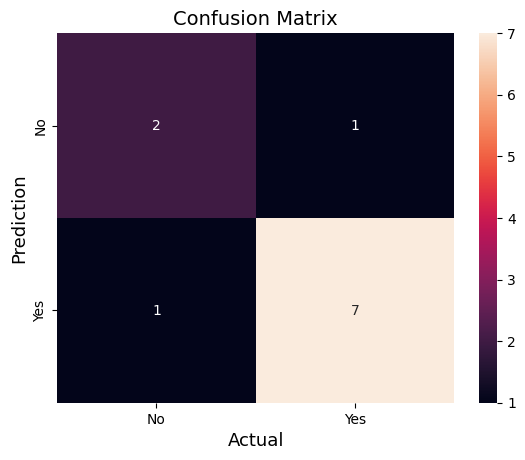

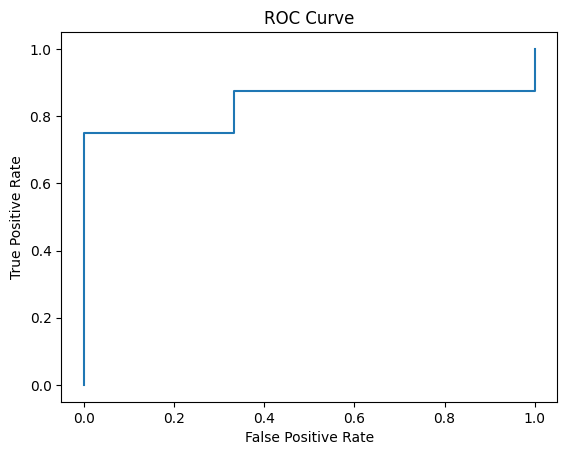

AUC: 83.33%
Accuracy: 81.82%
Precision: 87.5%
Recall: 87.5%
F1: 87.5%


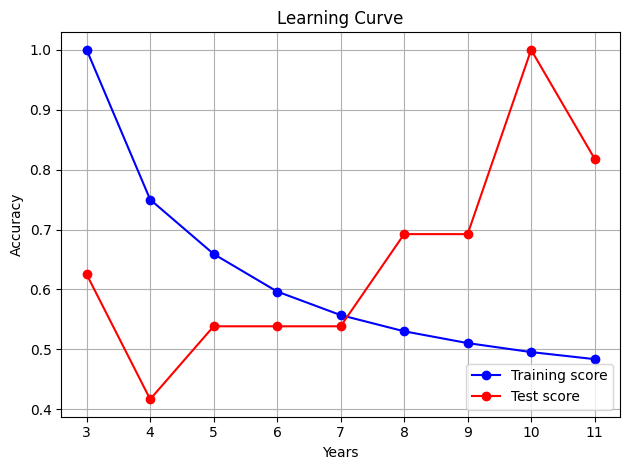

In [12]:
years = []
train_scores = []
test_scores = []

for year in df['year'].unique():
    if year < 3 or year > 11:
        continue        

    print(f"---------------------- YEAR {year} ----------------------")

    classifier = copy.deepcopy(classifier)

    class_utils.train_model_simple(classifier, df, year, target)
    #class_utils.train_model_hyper_tunning(classifier, df, year, target, param_grid)

    y_test, y_test_prob, conf_test, y_train, y_train_prob, conf_train = class_utils.test_model(classifier, df, year,
                                                                                               target)

    y_test_pred = class_utils.enforce_max_teams(y_test_prob, conf_test)
    y_train_pred = class_utils.enforce_max_teams(y_train_prob, conf_train)

    eval.model_score(y_test, y_test_pred, y_test_prob, year == 11)

    years.append(year)
    test_scores.append(accuracy_score(y_test, y_test_pred))
    train_scores.append(accuracy_score(y_train, y_train_pred))

eval.plot_learning_curve(years, train_scores, test_scores)


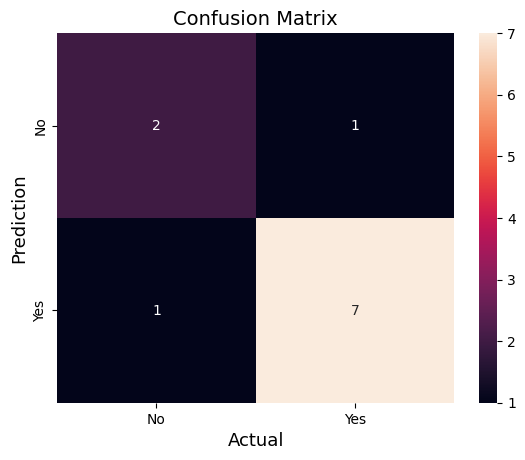

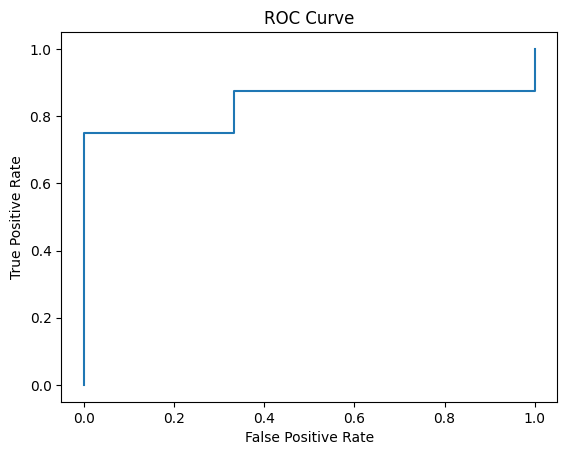

AUC: 83.33%
Accuracy: 81.82%
Precision: 87.5%
Recall: 87.5%
F1: 87.5%


In [13]:
y_test, y_test_prob, conf_test, y_train, y_train_prob, conf_train = class_utils.test_model(classifier, df, 11,target)
y_test_pred = class_utils.enforce_max_teams(y_test_prob, conf_test)
y_train_pred = class_utils.enforce_max_teams(y_train_prob, conf_train)
eval.model_score(y_test, y_test_pred, y_test_prob, True)